# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# obtain the maximun codified value of labels plus the value codified as zero
n_classes = np.max(y_train) + 1

#translate label to string
label = pd.read_csv('signnames.csv')



print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print('% Training =',np.round(100*n_train/(n_train+n_validation+n_test),0))
print('% Validation =',np.round(100*n_validation/(n_train+n_validation+n_test),0))
print('% Testing =',np.round(100*n_test/(n_train+n_validation+n_test),0))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
% Training = 67.0
% Validation = 9.0
% Testing = 24.0


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

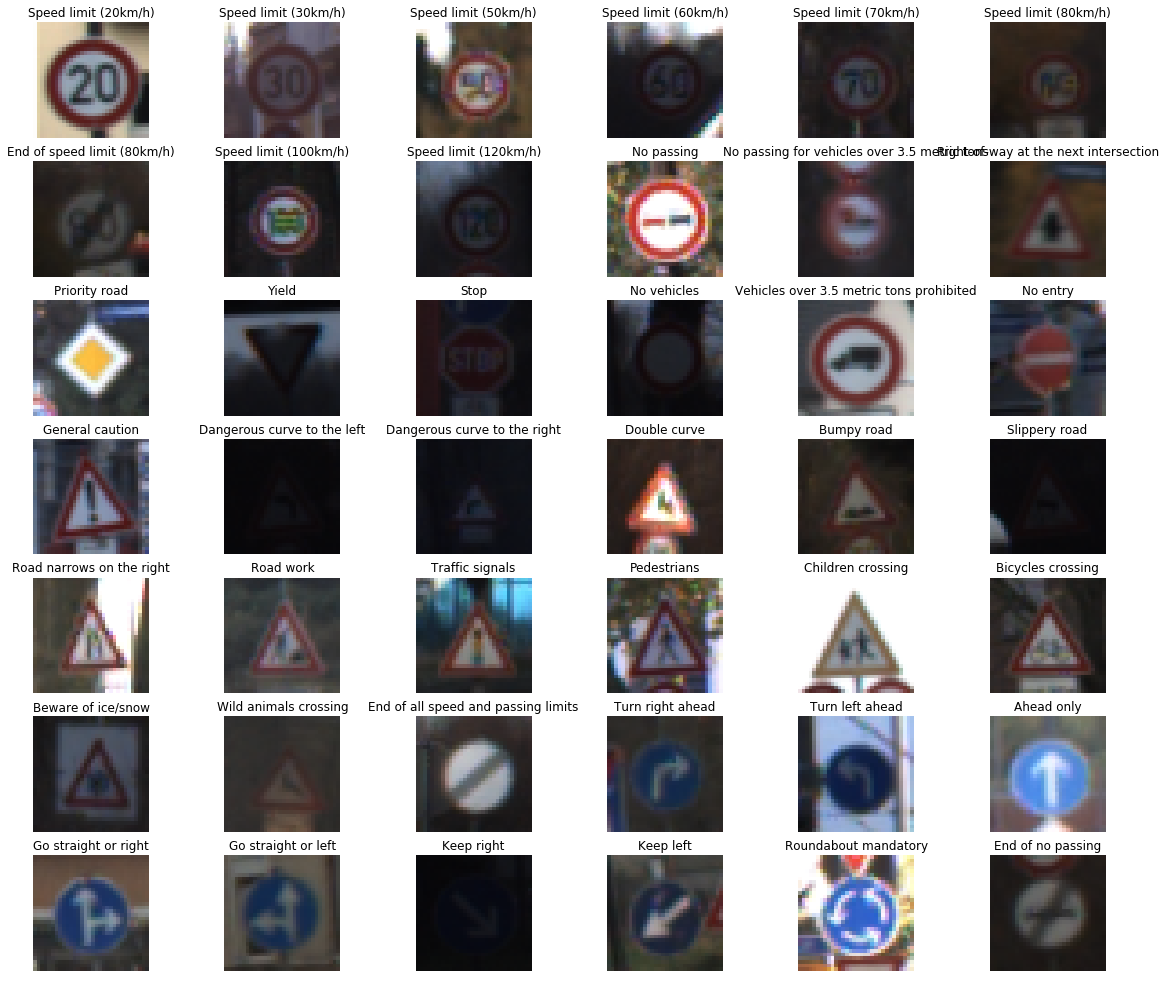

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
from matplotlib.ticker import StrMethodFormatter
# Visualizations will be shown in the notebook.
%matplotlib inline

#declare list will contain the index of each labeled example 
index = []

for i in range(n_classes):
    random = np.random.randint(10)
    pos = np.where(y_train==i)
    index.append(pos[0][random])
index = np.array(index)

#get the correspond image to index
examples = X_train[index]

# visualize the examples
gs00 = grid.GridSpec(8, 6)

fig = plt.figure(figsize=(20,20))
axs = []
cont = 0
for i in range(7):
    for j in range(6):
        ax = fig.add_subplot(gs00[i,j])
        ax.imshow(examples[cont])
        ax.set_title(label['SignName'].iloc[[cont]].item())
        plt.axis('off')
        cont += 1
        axs.append(ax)

fig.savefig('examples/Example_classes.jpg', transparent= False, bbox_inches='tight', pad_inches=0)

ClassId                                           SignName
      0                               Speed limit (20km/h)
      1                               Speed limit (30km/h)
      2                               Speed limit (50km/h)
      3                               Speed limit (60km/h)
      4                               Speed limit (70km/h)
      5                               Speed limit (80km/h)
      6                        End of speed limit (80km/h)
      7                              Speed limit (100km/h)
      8                              Speed limit (120km/h)
      9                                         No passing
     10       No passing for vehicles over 3.5 metric tons
     11              Right-of-way at the next intersection
     12                                      Priority road
     13                                              Yield
     14                                               Stop
     15                                        No vehicl

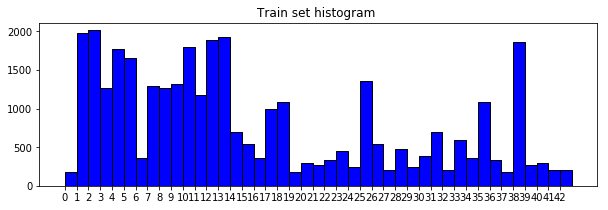

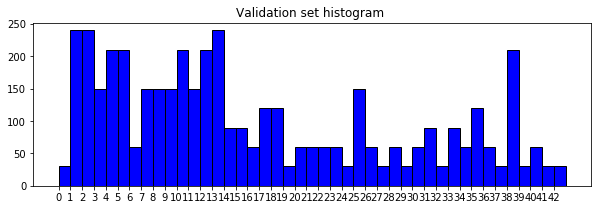

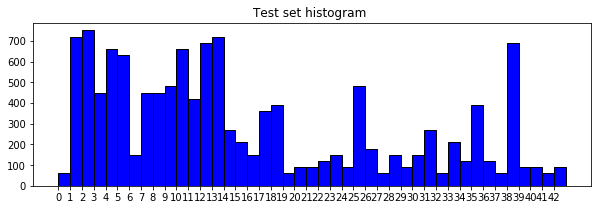

In [4]:
print(label.to_string(index=False))

plt.figure(figsize=(10,3))
bins = range(43)
plt.hist(y_train,bins=43,range=(0,43), align='mid', color = 'blue', edgecolor = 'black') 
plt.xticks(bins)
plt.title("Train set histogram ") 
plt.savefig('examples/Train_set_histogram.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()


plt.figure(figsize=(10,3))
plt.hist(y_valid,bins=43,range=(0,43), align='mid', color = 'blue', edgecolor = 'black') 
plt.xticks(bins)
plt.title("Validation set histogram ") 
plt.savefig('examples/Validation_set_histogram.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure(figsize=(10,3))
plt.hist(y_test, bins=43,range=(0,43), align='mid', color = 'blue', edgecolor = 'black') 
plt.xticks(bins)
plt.title("Test set histogram ") 
plt.savefig('examples/Test_set_histogram.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# Normalize RGB data set
def normalize_rgb(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """  
    XmaxR = np.max(image_data[:,:,0])
    XminR = np.min(image_data[:, :, 0])
    NormR = (image_data[:,:,0] - XminR)/(XmaxR - XminR)

    XmaxG = np.max(image_data[:,:,1])
    XminG = np.min(image_data[:, :, 1])
    NormG = (image_data[:,:,1] - XminG)/(XmaxG - XminG)
    
    XmaxB = np.max(image_data[:,:,2])
    XminB = np.min(image_data[:, :, 2])
    NormB = (image_data[:,:,2] - XminB)/(XmaxB - XminB)
    
    out_img = np.dstack((NormR, NormG, NormB))
    return out_img

# Normalize train dataset
X_train_normalize = []
for index, value in enumerate(X_train):
        X_train_normalize.append(normalize_rgb(X_train[index]))       
X_train_normalize = np.array(X_train_normalize)

# Normalize valid dataset
X_valid_normalize = []
for index, value in enumerate(X_valid):
        X_valid_normalize.append(normalize_rgb(X_valid[index]))       
X_valid_normalize = np.array(X_valid_normalize)

# Normalize test dataset
X_test_normalize = []
for index, value in enumerate(X_test):
        X_test_normalize.append(normalize_rgb(X_test[index]))       
X_test_normalize = np.array(X_test_normalize)



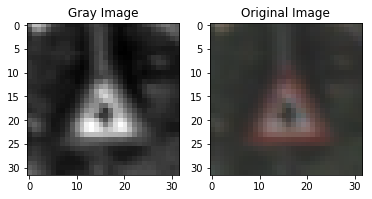

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
#convert to scale gray
import cv2

X_train_gray = np.zeros((X_train.shape[0],X_train.shape[1],X_train.shape[2]))
for index, value in enumerate(X_train):
        X_train_gray[index] = cv2.cvtColor(X_train[index], cv2.COLOR_RGB2GRAY)

        
X_valid_gray = np.zeros((X_valid.shape[0], X_valid.shape[1], X_valid.shape[2]))
for index, value in enumerate(X_valid):
        X_valid_gray[index] = cv2.cvtColor(X_valid[index], cv2.COLOR_RGB2GRAY)

        
X_test_gray = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2]))
for index, value in enumerate(X_test):
        X_test_gray[index] = cv2.cvtColor(X_test[index], cv2.COLOR_RGB2GRAY)
#compare image
plt.subplot('121')
plt.imshow(X_train_gray[9000],cmap='gray')
plt.title('Gray Image')
plt.subplot('122')
plt.title('Original Image')
plt.imshow(X_train[9000],)
plt.savefig('examples/grayscale.jpg', transparent= False, bbox_inches='tight', pad_inches=0)                         
#normalize al data set
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """  
    Xmax = np.max(image_data)
    Xmin = np.min(image_data)
    return (image_data-Xmin)/(Xmax - Xmin)



train_norm = np.zeros_like(X_train_gray)
for index, value in enumerate(X_train_gray):
    train_norm[index] = normalize_grayscale(X_train_gray[index])

valid_norm = np.zeros_like(X_valid_gray)
for index, value in enumerate(X_valid_gray):
    valid_norm[index] = normalize_grayscale(X_valid_gray[index])
    
test_norm = np.zeros_like(X_test_gray)
for index, value in enumerate(X_test_gray):
    test_norm[index] = normalize_grayscale(X_test_gray[index])


In [7]:
print('train',np.mean(train_norm),'\tvalid',np.mean(valid_norm),'\ttest',np.mean(test_norm))
print('train gray shape\n', train_norm.shape)

# convert to 4 Rank 
# train set
train_norm_set = np.zeros((train_norm.shape[0],train_norm.shape[1],train_norm.shape[2], 1))
for image in range(train_norm.shape[0]):
    train_norm_set[image,:,:,0] = train_norm[image,:,:]
print('train 4 rank shape\n', train_norm_set.shape,'\n')

# validation set
valid_norm_set = np.zeros((valid_norm.shape[0], valid_norm.shape[1], valid_norm.shape[2], 1))
for image in range(valid_norm.shape[0]):
    valid_norm_set[image, :, :, 0] = valid_norm[image, :, :]
print( 'valid 4 rank shape \n', valid_norm_set.shape, '\n')
# test set
test_norm_set = np.zeros((test_norm.shape[0], test_norm.shape[1], test_norm.shape[2], 1))
for image in range(test_norm.shape[0]):
    test_norm_set[image, :, :, 0] = test_norm[image, :, :]
print(' test 4 rank shape \n', test_norm_set.shape)

train 0.337743445731 	valid 0.34462550147 	test 0.332719910424
train gray shape
 (34799, 32, 32)
train 4 rank shape
 (34799, 32, 32, 1) 

valid 4 rank shape 
 (4410, 32, 32, 1) 

 test 4 rank shape 
 (12630, 32, 32, 1)


## Model Architecture to grayscale-normalized input

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def letnet(x, keep_prob):
    mu = 0
    std = 0.1
    
    # 1-convolution (C1) layer: shape filter (5,5,3), 6 layers, stride 1 and padding 0
    # 32x32x3 ==> 28x28x6
    conv_w1 = tf.Variable(tf.truncated_normal(shape =(5, 5, 1, 6), mean = mu, stddev = std))
    conv_b1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv_w1, strides = [1,1,1,1], padding = 'VALID') 
    conv1 = tf.nn.bias_add(conv1, conv_b1)
    
    # 2- pooling (s2) layer: relu activation, average pooling.
    # 28x28x6 ==> 14x14x6
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides= [1, 2, 2, 1], padding = 'SAME')
    
    # 3-convolution (C3) layer: shape filter (5,5,6, 16), 16 layer, stride 1 and padding 0
    # 14x14x6 ==> 10x10x16 
    conv_w2 = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = std))
    conv_b2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv_w2, strides=[1, 1, 1, 1], padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2, conv_b2)
    
    #4- pooling (S4) layer: relu activation, max pooling.
    #10x10x16 ==> 5x5x16
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    
    # Flatten: 5x5x16 ==> 400
    data = flatten(conv2)
    
    # 5- fully connected (C5)
    # 400==> 120
    fc_w1 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = std))
    fc_b1 = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(data, fc_w1) + fc_b1
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)    
    # 6- fully connected (C6)
    # 120==>84
    fc_w2  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = std))
    fc_b2  = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc_w2) + fc_b2
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)    
    # 7- output (logits)
    # 84 ==> 43
    output_w1 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean= mu, stddev= std))
    output_b1 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, output_w1) + output_b1
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
from sklearn.utils import shuffle
import time
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
# For dropout layers in LeNet
keep_prob = tf.placeholder(tf.float32)

EPOCHS =40
BATCH_SIZE = 128
LEARNING_RATE =0.001

logits = letnet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss = tf.reduce_mean(cross_entropy)
Optimizer = tf.train.AdamOptimizer(learning_rate= LEARNING_RATE)
training_operation = Optimizer.minimize(loss)
prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
saver = tf.train.Saver()

def evaluation(X_data, Y_label):
    size_data = len(X_data)
    T_accuracy = 0
    T_loss = 0
    sess = tf.get_default_session()
    for off in range(0,size_data, BATCH_SIZE):
        batchX, batchY = X_data[off:off+BATCH_SIZE], Y_label[off:off+BATCH_SIZE]
        accuracy1, loss1 = sess.run([accuracy,loss], feed_dict={
            x:  batchX,
            y:  batchY,
            keep_prob: 1.0
        })
        T_accuracy += (accuracy1*BATCH_SIZE)
        T_loss += (loss1*BATCH_SIZE)
    return T_accuracy/size_data, T_loss/size_data

global accuracy_training2, accuracy_validation2, loss_training2, timeGray
accuracy_training2 = []
accuracy_validation2 = []
loss_training2 = []
timeGray = 0

def trainingModel(X_train, y_train, X_valid, y_valid, model_save_path):
    Time0 = time.time()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        for epoch in range(EPOCHS):
            print('Training....\n')
            X_train, y_train = shuffle(X_train, y_train)
            for off in range(0,len(X_train),BATCH_SIZE):
                batchX, batchY = X_train[off:off+BATCH_SIZE], y_train[off:off+BATCH_SIZE]
                sess.run(training_operation, feed_dict={
                    x : batchX,
                    y : batchY,
                    keep_prob: 0.5
                })
            training_acc, loss_train = evaluation(X_train, y_train)
            validation_acc, loss = evaluation(X_valid, y_valid)
            accuracy_training2.append(training_acc)
            accuracy_validation2.append(validation_acc)
            loss_training2.append(loss_train)
            print('\n EPOCH {} ...\n'.format(epoch+1))
            print('Trainig accuracy: {:.3f},\t Cost training: {:.3f}'.format(training_acc, loss_train))
            print('Validation accuracy..{:.3f} \n'.format(validation_acc))
        print('Saving parameters model \n')
        saver.save(sess, model_save_path)
        print('Saved in', model_save_path)
    time_end = time.time()
    timeGray = round(time_end - Time0)
    print(' Total time to train model:', timeGray,'seconds')
    return timeGray

In [10]:
timeGray = trainingModel(train_norm_set, y_train, valid_norm_set, y_valid, './ModelDataGray/LeNetGray model')

Training....


 EPOCH 1 ...

Trainig accuracy: 0.672,	 Cost training: 1.277
Validation accuracy..0.638 

Training....


 EPOCH 2 ...

Trainig accuracy: 0.843,	 Cost training: 0.598
Validation accuracy..0.828 

Training....


 EPOCH 3 ...

Trainig accuracy: 0.898,	 Cost training: 0.408
Validation accuracy..0.865 

Training....


 EPOCH 4 ...

Trainig accuracy: 0.936,	 Cost training: 0.293
Validation accuracy..0.897 

Training....


 EPOCH 5 ...

Trainig accuracy: 0.954,	 Cost training: 0.212
Validation accuracy..0.919 

Training....


 EPOCH 6 ...

Trainig accuracy: 0.958,	 Cost training: 0.169
Validation accuracy..0.919 

Training....


 EPOCH 7 ...

Trainig accuracy: 0.968,	 Cost training: 0.148
Validation accuracy..0.944 

Training....


 EPOCH 8 ...

Trainig accuracy: 0.973,	 Cost training: 0.120
Validation accuracy..0.932 

Training....


 EPOCH 9 ...

Trainig accuracy: 0.979,	 Cost training: 0.103
Validation accuracy..0.946 

Training....


 EPOCH 10 ...

Trainig accuracy: 0.981,	

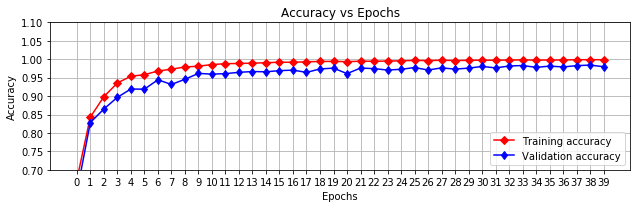

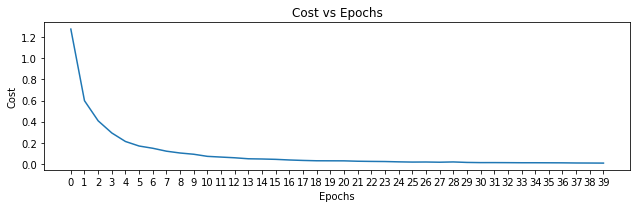

115


In [11]:
# visualitation accuracy vs epochs
fig = plt.figure(figsize=(9,3))
X_axis = range(EPOCHS)
Y_ticks = np.arange(0.7, 1.1, 0.05)
plt.plot(X_axis, accuracy_training2, 'r', label= 'Training accuracy', marker='D')
plt.plot(X_axis, accuracy_validation2, 'b', label = 'Validation accuracy',marker='d')
plt.title('Accuracy vs Epochs')
plt.xticks(X_axis)
plt.yticks(Y_ticks)
plt.xlabel('Epochs')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy', rotation= 90)
plt.legend(loc=4)
plt.grid(True)
plt.tight_layout()
plt.savefig('examples/AccuracyGray.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()

fig2 = plt.figure(figsize=(9,3))
plt.plot(X_axis, loss_training2)
plt.title('Cost vs Epochs')
plt.xticks(X_axis)
plt.xlabel('Epochs')
plt.ylabel('Cost', rotation = 90)
plt.tight_layout()
plt.savefig('examples/LossGray.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()
print(timeGray)

In [12]:
# Test moedel
with tf.Session() as sess:
    saver.restore(sess, './ModelDataGray/LeNetGray model')
    test_accuracy2, loss_test = evaluation(test_norm_set, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy2))

INFO:tensorflow:Restoring parameters from ./ModelDataGray/LeNetGray model
Test Accuracy = 0.945


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['./Images/60LimitSpeed.png', './Images/DangerousCurveLeft.png', './Images/roadWork.jpg', './Images/yield.png', './Images/Pederastians.png']


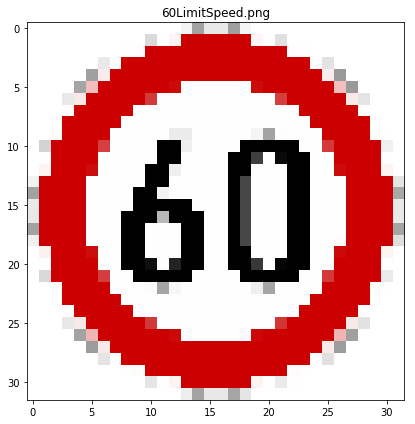

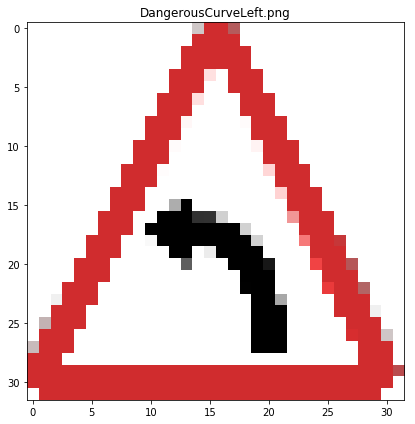

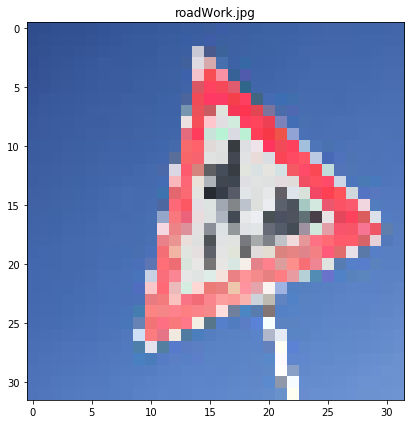

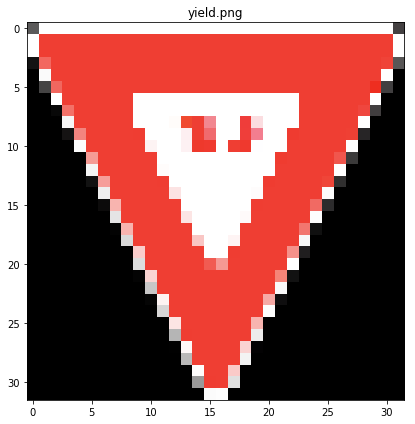

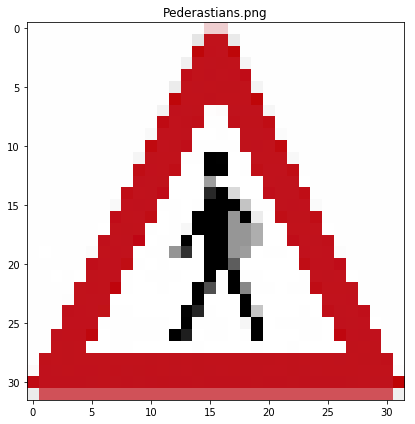

In [15]:
### Load the images and plot them here.
import glob
import matplotlib.image as mpimg
images_set = glob.glob('./Images/*')
print(images_set)
test_images_set = []
for i in range(len(images_set)):
    img = mpimg.imread(images_set[i])
    img = cv2.resize(img, (32,32))   
    test_images_set.append(img)

# firts image
plt.figure(figsize=(6,6))
plt.title(images_set[0][9:])
plt.imshow(test_images_set[0])  
plt.tight_layout()
plt.show()   

# second image
plt.figure(figsize=(6,6))
plt.title(images_set[1][9:])
plt.imshow(test_images_set[1])  
plt.tight_layout()
plt.show()   

# third image
plt.figure(figsize=(6,6))
plt.title(images_set[2][9:])
plt.imshow(test_images_set[2])  
plt.tight_layout()
plt.show()   

# four image
plt.figure(figsize=(6,6))
plt.title(images_set[3][9:])
plt.imshow(test_images_set[3])  
plt.tight_layout()
plt.show()   

# five image
plt.figure(figsize=(6,6))
plt.title(images_set[4][9:])
plt.imshow(test_images_set[4])  
plt.tight_layout()
plt.show()  


## Pre-processing images.

### Normalize and converto to grayscale.

In [16]:
# convert to gray scale and normalize the image
test_images_set_gray = []
for index in range(len(test_images_set)):
    foobar = cv2.cvtColor(test_images_set[index], cv2.COLOR_RGB2GRAY)
    foobar2 = normalize_grayscale(foobar)
    test_images_set_gray.append(foobar2)


test_images_set_gray = np.array(test_images_set_gray)

#normalize RGB space
test_images_set_RGB = []
for index in range(len(test_images_set)):
    img = normalize_rgb(test_images_set[index])
    test_images_set_RGB.append(img)

In [17]:
# convert to 4 Rank 
# train set
test_images_set_gray_norm = np.zeros((test_images_set_gray.shape[0],test_images_set_gray.shape[1],test_images_set_gray.shape[2], 1))
for image in range(test_images_set_gray.shape[0]):
    test_images_set_gray_norm[image,:,:,0] = test_images_set_gray[image,:,:]
print('train 4 rank shape\n', test_images_set_gray_norm.shape,'\n')


train 4 rank shape
 (5, 32, 32, 1) 



### Predict the Sign Type for Each Image whit Grayscale Input

In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
#saver = tf.train.Saver()
y_labels = [13, 19, 25, 27, 3]

with tf.Session() as sess:
    saver.restore(sess, './ModelDataGray/LeNetGray model')
    test_prediction = tf.argmax(logits, 1)
    accuracy_new_images2 = sess.run(accuracy, feed_dict={
            x:  test_images_set_gray_norm,
            y:  y_labels,
            keep_prob: 1.0
    })
    output = sess.run(test_prediction , feed_dict = {
        x: test_images_set_gray_norm,
        keep_prob: 1.0
    } )

sign_names = pd.read_csv('signnames.csv')
y_sign_desc = sign_names['SignName']
print('Expected: \n',y_sign_desc[y_labels], y_labels)
print ('\n Prediction: \n', y_sign_desc[output], output)
print('Accuracy', accuracy_new_images2)    

INFO:tensorflow:Restoring parameters from ./ModelDataGray/LeNetGray model
Expected: 
 13                          Yield
19    Dangerous curve to the left
25                      Road work
27                    Pedestrians
3            Speed limit (60km/h)
Name: SignName, dtype: object [13, 19, 25, 27, 3]

 Prediction: 
 13                                    Yield
35                               Ahead only
18                          General caution
11    Right-of-way at the next intersection
3                      Speed limit (60km/h)
Name: SignName, dtype: object [13 35 18 11  3]
Accuracy 0.4


## Model Architecture to RGB input

### Train, Validate and Test the Model RGB

In [17]:
def letnetRGB(x2, keep_prob2):
    mu = 0
    std = 0.1
    
    # 1-convolution (C1) layer: shape filter (5,5,3), 6 layers, stride 1 and padding 0
    # 32x32x3 ==> 28x28x6
    conv_w1 = tf.Variable(tf.truncated_normal(shape =(5, 5, 3, 6), mean = mu, stddev = std))
    conv_b1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x2, conv_w1, strides = [1,1,1,1], padding = 'VALID') 
    conv1 = tf.nn.bias_add(conv1, conv_b1)
    
    # 2- pooling (s2) layer: relu activation, average pooling.
    # 28x28x6 ==> 14x14x6
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides= [1, 2, 2, 1], padding = 'SAME')
    
    # 3-convolution (C3) layer: shape filter (5,5,6, 16), 16 layer, stride 1 and padding 0
    # 14x14x6 ==> 10x10x16 
    conv_w2 = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = std))
    conv_b2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv_w2, strides=[1, 1, 1, 1], padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2, conv_b2)
    
    #4- pooling (S4) layer: relu activation, max pooling.
    #10x10x16 ==> 5x5x16
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    
    # Flatten: 5x5x16 ==> 400
    data = flatten(conv2)
    
    # 5- fully connected (C5)
    # 400==> 120
    fc_w1 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = std))
    fc_b1 = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(data, fc_w1) + fc_b1
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob2)   
    
    # 6- fully connected (C6)
    # 120==>84
    fc_w2  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = std))
    fc_b2  = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc_w2) + fc_b2
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob2)   
    
    # 7- output (logits)
    # 84 ==> 43
    output_w1 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean= mu, stddev= std))
    output_b1 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, output_w1) + output_b1
    
    return logits

In [18]:
x2 = tf.placeholder(tf.float32, (None, 32, 32, 3))
y2 = tf.placeholder(tf.int32, (None))
one_hot_y2 = tf.one_hot(y2, 43)
keep_prob2 = tf.placeholder(tf.float32)

logits2 = letnetRGB(x2, keep_prob2)
cross_entropy2 = tf.nn.softmax_cross_entropy_with_logits(logits = logits2, labels = one_hot_y2)
loss2 = tf.reduce_mean(cross_entropy2)
Optimizer2 = tf.train.AdamOptimizer(learning_rate= LEARNING_RATE)
training_operation2 = Optimizer2.minimize(loss2)
prediction2 = tf.equal(tf.argmax(logits2, 1), tf.argmax(one_hot_y2, 1))
accuracy2 = tf.reduce_mean(tf.cast(prediction2, tf.float32))
saver2 = tf.train.Saver()
def evaluation2(X_data, Y_label):
    size_data = len(X_data)
    T_accuracy = 0
    T_loss = 0
    sess = tf.get_default_session()
    for off in range(0,size_data, BATCH_SIZE):
        batchX, batchY = X_data[off:off+BATCH_SIZE], Y_label[off:off+BATCH_SIZE]
        accuracy1, loss1 = sess.run([accuracy2,loss2], feed_dict={
            x2:  batchX,
            y2:  batchY,
            keep_prob2 : 1.0
        })
        T_accuracy += (accuracy1*BATCH_SIZE)
        T_loss += (loss1*BATCH_SIZE)
    return T_accuracy/size_data, T_loss/size_data

global accuracy_training, accuracy_validation, loss_training, timeRGB
accuracy_training = []
accuracy_validation = []
loss_training = []
timeRGB = 0

def trainingModel2(X_train, y_train, X_valid, y_valid, model_save_path):
    Time0 = time.time()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        for epoch in range(EPOCHS):
            print('Training....\n')
            X_train, y_train = shuffle(X_train, y_train)
            for off in range(0,len(X_train),BATCH_SIZE):
                batchX, batchY = X_train[off:off+BATCH_SIZE], y_train[off:off+BATCH_SIZE]
                sess.run(training_operation2, feed_dict={
                    x2 : batchX,
                    y2 : batchY,
                    keep_prob2: 0.5
                })
            training_acc, loss_train = evaluation2(X_train, y_train)
            validation_acc, loss = evaluation2(X_valid, y_valid)
            accuracy_training.append(training_acc)
            accuracy_validation.append(validation_acc)
            loss_training.append(loss_train)
            if  accuracy_training is None or accuracy_validation is None or loss_training is None:
                print('You must initialize accuracy_training, accuracy_validation and loss_training')
                break
            print('\n EPOCH {} ...\n'.format(epoch+1))
            print('Trainig accuracy: {:.3f},\t Cost training: {:.3f}'.format(training_acc,loss_train))
            print('Validation accuracy..{:.3f} \n'.format(validation_acc))
        print('Saving parameters model \n')
        saver2.save(sess, model_save_path)
        print('Saved in', model_save_path)
    time_end = time.time()
    timeRGB = round(time_end - Time0)
    print(' Total time to train model:', timeRGB ,'seconds')
    return timeRGB

In [19]:
timeRGB = trainingModel2(X_train_normalize, y_train, X_valid_normalize, y_valid, './ModelDataRGB/LeNetRGB model')

Training....


 EPOCH 1 ...

Trainig accuracy: 0.667,	 Cost training: 1.172
Validation accuracy..0.629 

Training....


 EPOCH 2 ...

Trainig accuracy: 0.845,	 Cost training: 0.584
Validation accuracy..0.815 

Training....


 EPOCH 3 ...

Trainig accuracy: 0.911,	 Cost training: 0.331
Validation accuracy..0.879 

Training....


 EPOCH 4 ...

Trainig accuracy: 0.941,	 Cost training: 0.251
Validation accuracy..0.898 

Training....


 EPOCH 5 ...

Trainig accuracy: 0.955,	 Cost training: 0.188
Validation accuracy..0.918 

Training....


 EPOCH 6 ...

Trainig accuracy: 0.966,	 Cost training: 0.161
Validation accuracy..0.935 

Training....


 EPOCH 7 ...

Trainig accuracy: 0.972,	 Cost training: 0.121
Validation accuracy..0.936 

Training....


 EPOCH 8 ...

Trainig accuracy: 0.975,	 Cost training: 0.100
Validation accuracy..0.939 

Training....


 EPOCH 9 ...

Trainig accuracy: 0.978,	 Cost training: 0.087
Validation accuracy..0.936 

Training....


 EPOCH 10 ...

Trainig accuracy: 0.983,	

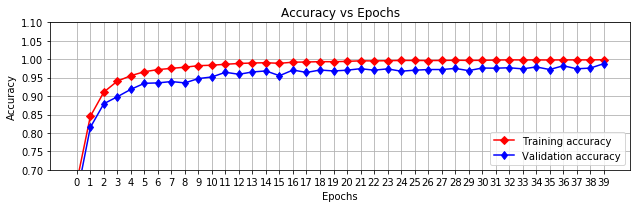

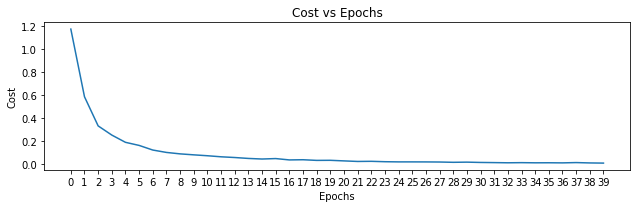

In [20]:
# visualitation accuracy vs epochs
fig = plt.figure(figsize=(9,3))
plt.plot(X_axis, accuracy_training, 'r', label= 'Training accuracy', marker='D')
plt.plot(X_axis, accuracy_validation, 'b', label = 'Validation accuracy',marker='d')
plt.title('Accuracy vs Epochs')
plt.xticks(X_axis)
plt.yticks(Y_ticks)
plt.xlabel('Epochs')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy', rotation= 90)
plt.legend(loc=4)
plt.grid(True)
plt.tight_layout()
plt.savefig('examples/AcuraccyRGB.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()

fig2 = plt.figure(figsize=(9,3))
plt.plot(X_axis, loss_training)
plt.title('Cost vs Epochs')
plt.xticks(X_axis)
plt.xlabel('Epochs')
plt.ylabel('Cost', rotation = 90)
plt.tight_layout()
plt.savefig('examples/LossRGB.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()

In [21]:
# Test moedel
with tf.Session() as sess:
    saver2.restore(sess, './ModelDataRGB/LeNetRGB model')
    test_accuracy, loss_test = evaluation2(X_test_normalize, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./ModelDataRGB/LeNetRGB model
Test Accuracy = 0.948


### Predict the Sign Type for Each Image whit RGB Input

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

with tf.Session() as sess:
    saver2.restore(sess, './ModelDataRGB/LeNetRGB model')
    test_prediction2 = tf.argmax(logits2, 1)
    accuracy_new_images= sess.run(accuracy2, feed_dict={
            x2:  test_images_set_RGB,
            y2:  y_labels,
            keep_prob2: 1.0
    })
    output = sess.run(test_prediction2 , feed_dict = {
        x2: test_images_set_RGB,
        keep_prob2: 1.0
    } )

sign_names = pd.read_csv('signnames.csv')
y_sign_desc = sign_names['SignName']
print('Expected: \n',y_sign_desc[y_labels], y_labels)
print ('\n Prediction: \n', y_sign_desc[output], output)
print('Accuracy', accuracy_new_images)  

INFO:tensorflow:Restoring parameters from ./ModelDataRGB/LeNetRGB model
Expected: 
 13                          Yield
19    Dangerous curve to the left
25                      Road work
27                    Pedestrians
3            Speed limit (60km/h)
Name: SignName, dtype: object [13, 19, 25, 27, 3]

 Prediction: 
 13                   Yield
23           Slippery road
18         General caution
27             Pedestrians
3     Speed limit (60km/h)
Name: SignName, dtype: object [13 23 18 27  3]
Accuracy 0.6


### Analyze Performance

In [23]:
print('Model with gray inputs. \nFinal train SET accuracy :\t', accuracy_training2[-1],\
      '\nFinal validation SET accuracy :\t',accuracy_validation2[-1],'\nTest SET accuracy:\t',test_accuracy2,\
     '\nTest new images', accuracy_new_images2,'\nThe training time:\t', timeGray)

print('\n\nModel with RGB inputs. \nFinal train SET accuracy :\t', accuracy_training[-1],\
      '\nFinal validation SET accuracy\t:',accuracy_validation[-1],'\nTest SET accuracy:\t',test_accuracy,\
     '\nTest new images', accuracy_new_images, '\nThe training time:\t', timeRGB)


Model with gray inputs. 
Final train SET accuracy :	 0.99873559585 
Final validation SET accuracy :	 0.979771679383 
Test SET accuracy:	 0.944975970609 
Test new images 0.4 
The training time:	 115


Model with RGB inputs. 
Final train SET accuracy :	 0.998678122935 
Final validation SET accuracy	: 0.98798185941 
Test SET accuracy:	 0.948102524275 
Test new images 0.6 
The training time:	 146


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
# In this case. I just will evaluate the first 5 softmax probabilities in the second model (corresponding to RGB inputs).
with tf.Session() as sess:
    saver2.restore(sess,'./ModelDataRGB/LeNetRGB model')
    predictor = tf.nn.softmax(logits2)
    classification = sess.run(tf.nn.top_k(predictor, k=5), feed_dict ={
        x2 : test_images_set_RGB,
        keep_prob2 : 1.0, 
    })


INFO:tensorflow:Restoring parameters from ./ModelDataRGB/LeNetRGB model


In [25]:
print(classification[0][0])
print(classification[1][0][0])

[  1.00000000e+00   1.29508712e-25   1.81222593e-28   1.18667407e-29
   6.82336244e-31]
13


examples/prediction0.jpg


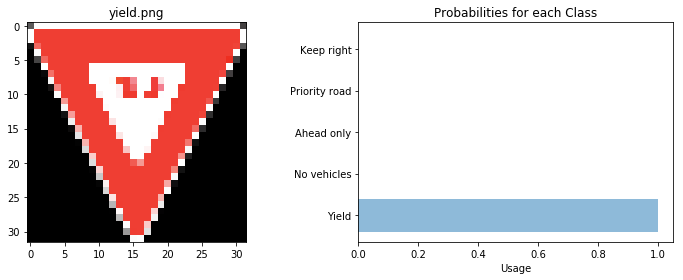

[  1.00000000e+00   1.29508712e-25   1.81222593e-28   1.18667407e-29
   6.82336244e-31] 
 [13 15 35 12 38]
examples/prediction1.jpg


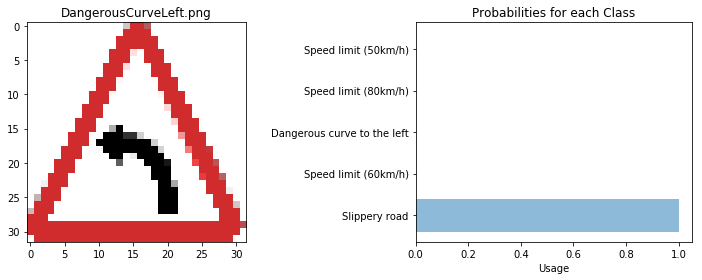

[  9.99917507e-01   6.48188798e-05   1.76531248e-05   1.14456611e-09
   3.02742033e-12] 
 [23  3 19  5  2]
examples/prediction2.jpg


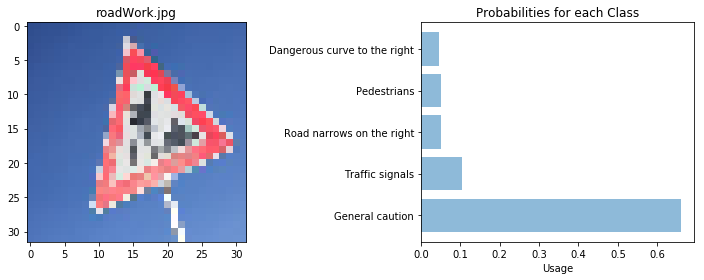

[ 0.65942538  0.1030508   0.05166717  0.04965644  0.04545281] 
 [18 26 24 27 20]
examples/prediction3.jpg


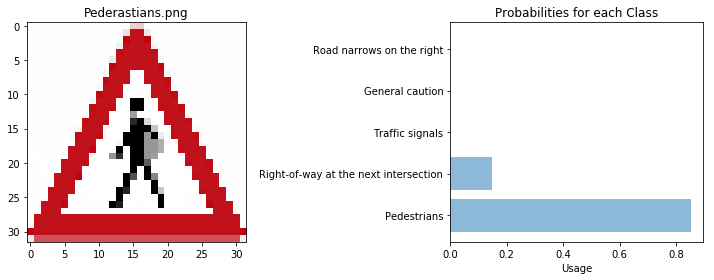

[  8.53595376e-01   1.46404430e-01   6.33031760e-08   5.37350608e-08
   3.91502866e-08] 
 [27 11 26 18 24]
examples/prediction4.jpg


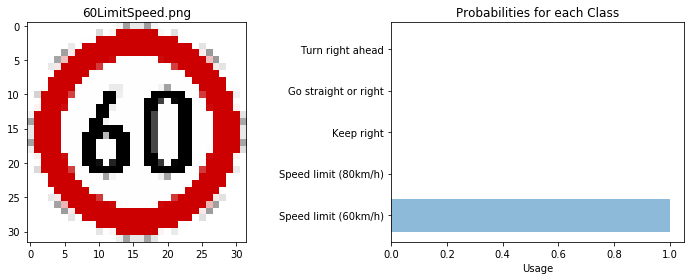

[  9.99424219e-01   3.88085580e-04   1.84964709e-04   2.65852304e-06
   5.13824148e-08] 
 [ 3  5 38 36 33]


In [26]:
#visualize the probabilities

for i in range(len(test_images_set_RGB)):
    labels = []
    for j in range(5):
        labels.append(y_sign_desc[classification[1][i][j]])
    y_ticks = range(len(labels))
    
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.imshow(test_images_set[i])
    plt.title(images_set[i][9:])
    plt.subplot(122)
    plt.barh(y_ticks, classification[0][i], align='center', alpha=0.5)
    plt.yticks(y_ticks, labels)
    plt.xlabel('Usage')
    plt.title('Probabilities for each Class')
    plt.tight_layout()
    path = 'examples/prediction'+str(i)+'.jpg'
    print(path)
    plt.savefig(path, transparent= False, bbox_inches='tight', pad_inches=0)
    plt.show()
    print(classification[0][i], '\n', classification[1][i])

the results shows that the model predict very well 3 of 5 images. the two badly predicted images are due to the fact that first one (road work) has a blue background that can produce noise in the model. The other (Dangerous Curve Left) is because of the training set images correspond to this image are dark or unclear reading who we can see in the next checking:

(1, 180)


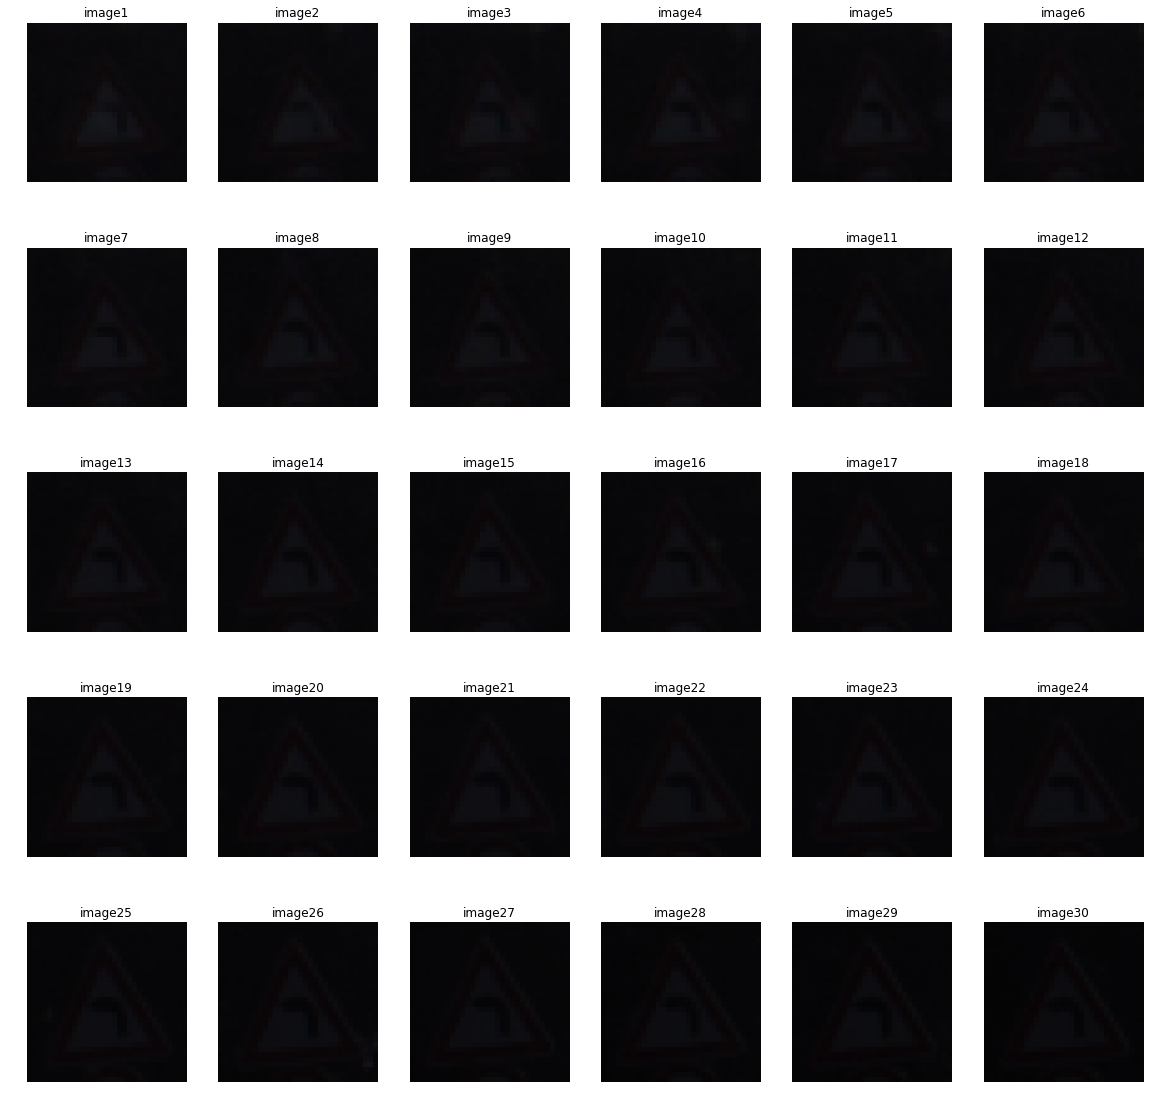

In [22]:
index = np.where(y_train == 19)
print((np.array(index).shape))
CruveLeft = X_train[index]
fig = plt.figure(figsize=(20,20))
axs = []
cont = 0
gs00 = grid.GridSpec(5, 6)
for i in range(5):
    for j in range(6):
        ax = fig.add_subplot(gs00[i,j])
        ax.imshow(CruveLeft[cont])
        ax.set_title('image'+str(cont+1))
        plt.axis('off')
        cont += 1
        axs.append(ax)

fig.savefig('examples/CruveLeftIssue.jpg', transparent= False, bbox_inches='tight', pad_inches=0)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [27]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")